In [36]:
import csv
import ast
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.cm import get_cmap

def time_to_float(t):
    h, m = t.split(':')
    return int(h) + int(m)/60.0

def shorten_name(name, max_len=15):
    return name if len(name) <= max_len else name[:max_len-3] + '...'

def load_course_data(csv_file):
    fieldnames = ["Course_code","Course_name","Credits","Count","Section","Faculty Name","Schedule"]
    course_entries = []
    with open(csv_file, 'r', newline='', encoding='utf-8') as f:
        reader = csv.DictReader(f, fieldnames=fieldnames, delimiter=',', quotechar='"')
        header = next(reader, None)

        if header is not None and 'Course_code' not in header['Course_code']:
            row = header
            schedule_str = row['Schedule'].strip()
            schedule = ast.literal_eval(schedule_str)
            course_entries.append({
                "course_code": row['Course_code'].strip(),
                "course_name": row['Course_name'].strip(),
                "section": row['Section'].strip(),
                "faculty": row['Faculty Name'].strip(),
                "schedule": schedule
            })

        for row in reader:
            schedule_str = row['Schedule'].strip()
            schedule = ast.literal_eval(schedule_str)
            course_entries.append({
                "course_code": row['Course_code'].strip(),
                "course_name": row['Course_name'].strip(),
                "section": row['Section'].strip(),
                "faculty": row['Faculty Name'].strip(),
                "schedule": schedule
            })
    return course_entries

def plot_timetable(course_codes, course_entries):
    filtered_courses = [ce for ce in course_entries if ce['course_code'] in course_codes]
    if not filtered_courses:
        print("No matching courses found.")
        return

    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
    day_to_num = {d: i for i, d in enumerate(day_order)}  

    fig, ax = plt.subplots(figsize=(10,6))

    for hour in range(8, 19):
        ax.axvline(x=hour, color='lightgray', linewidth=1, linestyle='--')

    for i in range(len(day_order)+1):
        ax.axhline(y=i, color='lightgray', linewidth=1)

    cmap = get_cmap('tab20')
    num_courses = len(filtered_courses)
    colors = [cmap(i % 20) for i in range(num_courses)]

    for idx, c_info in enumerate(filtered_courses):
        course_name = shorten_name(c_info['course_name'], max_len=15)
        faculty = c_info['faculty']
        ccode = c_info['course_code']


        for session in c_info['schedule']:
            d = session['day']
            if d not in day_to_num:
                continue
            y = day_to_num[d]
            start = time_to_float(session['start_time'])
            end = time_to_float(session['end_time'])
            room = session.get('room', '')

            height = 0.8
    
            rect = patches.Rectangle((start, y+0.1), end - start, height,
                                     edgecolor='black', facecolor=colors[idx], alpha=0.7)
            ax.add_patch(rect)

    
            text_str = f"{ccode}\n{course_name}\n[{faculty}]\n{room}\n{session['start_time']}-{session['end_time']}"
            ax.text((start+end)/2, y+0.5, text_str,
                    ha='center', va='center', fontsize=8, wrap=True)

    ax.set_xlim(8, 18)
    ax.set_ylim(len(day_order), 0)  

    ax.set_xticks(range(8, 19))
    ax.set_xticklabels([f"{h}:00" for h in range(8,19)], fontsize=9)

    ax.set_yticks([i+0.5 for i in range(len(day_order))])
    ax.set_yticklabels(day_order, fontsize=10)

    ax.set_title("Timetable")
    ax.set_xlabel("Time")
    ax.set_ylabel("Day")

    plt.tight_layout()
    plt.show()



/tmp/ipykernel_345271/1430075294.py:62: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab20')


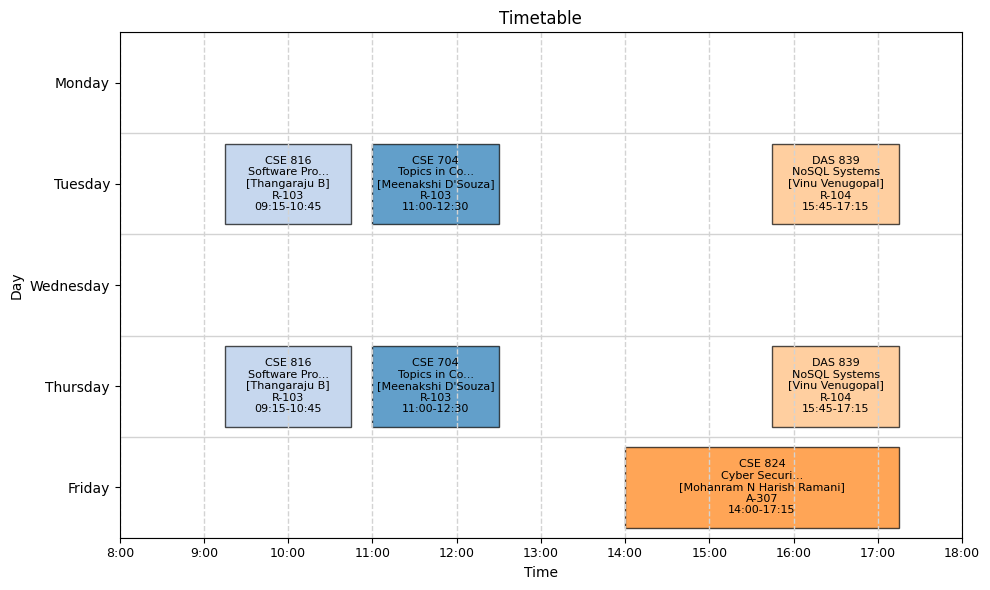

In [37]:
entries = load_course_data("schedules.csv")
plot_timetable(["CSE 816", "DAS 839", "CSE 824", "CSE 704"], entries)